Estimating empirical error terms

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import arch
import datetime as dt
%matplotlib inline

In [2]:
spx = pd.read_csv('^GSPC.csv', index_col=0)

In [3]:
spx['daily_chg'] = spx['Adj Close'].pct_change()

In [4]:
df, loc, scale = stats.t.fit(spx['daily_chg'][1500:])
df_all, loc_all, scale_all = stats.t.fit(spx['daily_chg'][1:])
loc_norm, scale_norm = stats.norm.fit(spx['daily_chg'][1:])

In [5]:
normal_sample =  stats.norm.rvs(loc_norm, scale_norm, size=10000000)

In [6]:
sample = stats.t.rvs(df, loc, scale, size=10000000)
sample_all = stats.t.rvs(df_all, loc_all, scale_all, size=10000000)

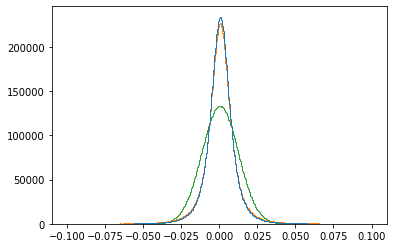

In [23]:
plt.hist(x=(sample, sample_all, normal_sample), bins=500, range=[-0.1, .1], histtype='step')
plt.show()

Simulating market with t-distributions

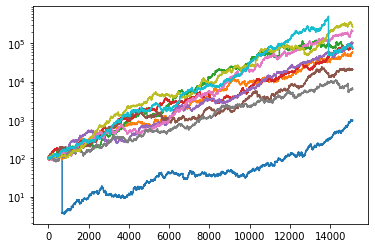

In [48]:
years = 60
t_days = 252

market = np.empty((t_days*years, 100))

num_sims = 10

for j in range(num_sims):
    market_sample = stats.t.rvs(df, loc, scale, size=t_days*years)
    market[0, j] = 100
    for i, err in enumerate(market_sample, start=1):
        if i < (t_days*years):
            market[i, j] = market[i-1, j]*(1+err)
        

plt.plot(market[:, 0:num_sims])
plt.yscale('log')
plt.show()

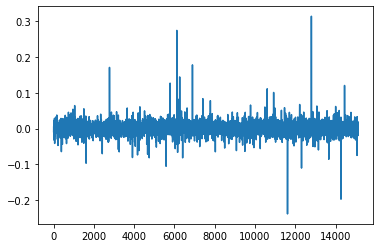

In [42]:
plt.plot(market_sample)
plt.show()

In [19]:
(market[-1, 0]/market[0, 0])**(1/60)-1

0.13534954365356566

Fitting GARCH model

In [8]:
model=arch.arch_model(spx['daily_chg'][1500:]*100, vol='Garch', p=1, o=1, q=1, dist='skewt')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 26836.9945160837
Iteration:      2,   Func. Count:     24,   Neg. LLF: 26832.12199008242
Iteration:      3,   Func. Count:     35,   Neg. LLF: 26815.127645823824
Iteration:      4,   Func. Count:     46,   Neg. LLF: 26806.145196503618
Iteration:      5,   Func. Count:     56,   Neg. LLF: 26793.497500063888
Iteration:      6,   Func. Count:     66,   Neg. LLF: 26778.540474064353
Iteration:      7,   Func. Count:     76,   Neg. LLF: 26774.319223272032
Iteration:      8,   Func. Count:     87,   Neg. LLF: 26772.3445513469
Iteration:      9,   Func. Count:     97,   Neg. LLF: 26766.883893810213
Iteration:     10,   Func. Count:    107,   Neg. LLF: 26762.98917763644
Iteration:     11,   Func. Count:    117,   Neg. LLF: 26761.72115467726
Iteration:     12,   Func. Count:    127,   Neg. LLF: 26756.082576296485
Iteration:     13,   Func. Count:    138,   Neg. LLF: 26755.805237417364
Iteration:     14,   Func. Count:    148,   Neg. LLF: 2675

In [17]:
model=arch.arch_model(spx['daily_chg'][1:]*100, vol='Garch', p=1, o=1, q=1, dist='studentst')
results=model.fit()
print(results.summary())
resid = results.resid

Iteration:      1,   Func. Count:      8,   Neg. LLF: 30052.63815914022
Iteration:      2,   Func. Count:     22,   Neg. LLF: 30035.425504097035
Iteration:      3,   Func. Count:     31,   Neg. LLF: 30014.757387364312
Iteration:      4,   Func. Count:     42,   Neg. LLF: 30013.974133163996
Iteration:      5,   Func. Count:     51,   Neg. LLF: 29957.373651141043
Iteration:      6,   Func. Count:     60,   Neg. LLF: 29939.710695105263
Iteration:      7,   Func. Count:     69,   Neg. LLF: 29926.85419848746
Iteration:      8,   Func. Count:     78,   Neg. LLF: 29923.231445934558
Iteration:      9,   Func. Count:     87,   Neg. LLF: 29912.514419969055
Iteration:     10,   Func. Count:     97,   Neg. LLF: 29912.28472833951
Iteration:     11,   Func. Count:    106,   Neg. LLF: 29910.750412031342
Iteration:     12,   Func. Count:    115,   Neg. LLF: 29910.16352614779
Iteration:     13,   Func. Count:    125,   Neg. LLF: 29910.089988773536
Iteration:     14,   Func. Count:    134,   Neg. LLF: 2

In [10]:
print(forecasts.mean)


NameError: name 'forecasts' is not defined

In [11]:
market_sample = []
t_days = 252
year = 2
period = t_days*year
period = 252*10


forecasts = results.forecast(horizon=period, method='simulation', simulations=1, start= dt.date(2020, 1, 8))

#sims = forecasts.simulations
#sims = [sim[0]/100 for sim in sims.values[-1,:,:].T]
#market_sample.extend(sims)

#lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=1)
#plt.show()


KeyboardInterrupt: 

In [197]:
sims = forecasts.simulations
sims = [sim[0]/100 for sim in sims.values[-1,:,:].T]
market_sample.extend(sims)



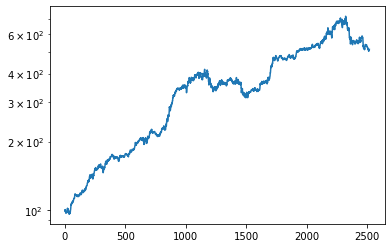

In [198]:
market = np.empty((period, 100))

num_sims = 1

trend = 1.000
for j in range(num_sims):
    #market_sample = stats.t.rvs(df, loc, scale, size=252*years)
    market[0, j] = 100
    for i, err in enumerate(market_sample, start=1):
        if i < (period):
            market[i, j] = market[i-1, j]*(1+err)
        
plt.plot(market[:, 0:num_sims])
plt.yscale('log')
plt.show()

In [199]:
diff = pd.DataFrame(market_sample)

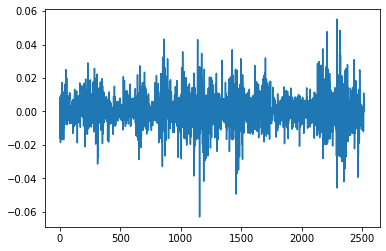

In [200]:
plt.plot(diff)
plt.show()

In [57]:
diff.describe()

,0
count,2520.000000
mean,0.000298
std,0.008583
min,-0.052814
25%,-0.003999
50%,0.000564
75%,0.004924
max,0.049376


Manual GARCH forecast

In [ ]:
def y_t(b, epsilon):
    return b+epsilon

def epsilon_t(t, i):
    stats.t.rvs(v, )
    
def sigma_t(omega, alpha, beta, q, p, sigma_t_minus_1, epsilon_t_minus_1):
    
    
def alpha_term(t, alpha, q, epsilon_t_minus_1):
    for each i in range(q):
        alpha_i*epsilon_t(t, i)
        
def sigma_t_minus_i(previous_returns):
    df, loc, scale = stats.t.fit(previous_returns)
    return stats.t(df, loc, scale).var
    
def sigma_t(omega, alpha, beta, q, p, sigma_t_minus_1, epsilon_t_minus_1):

### Fitting initial residual distribution

In [12]:
model=arch.arch_model(spx['daily_chg'][1:]*100, vol='Garch', p=1, o=1, q=1, dist='studentst')
results=model.fit()
resid = results.resid

Iteration:      1,   Func. Count:      7,   Neg. LLF: 30210.701497038684
Iteration:      2,   Func. Count:     21,   Neg. LLF: 30188.578396728415
Iteration:      3,   Func. Count:     30,   Neg. LLF: 30169.25469075337
Iteration:      4,   Func. Count:     39,   Neg. LLF: 30163.81868566059
Iteration:      5,   Func. Count:     47,   Neg. LLF: 30109.402067965522
Iteration:      6,   Func. Count:     55,   Neg. LLF: 30097.116078287832
Iteration:      7,   Func. Count:     63,   Neg. LLF: 30086.07821241442
Iteration:      8,   Func. Count:     72,   Neg. LLF: 30084.51316061552
Iteration:      9,   Func. Count:     79,   Neg. LLF: 30075.58692681198
Iteration:     10,   Func. Count:     87,   Neg. LLF: 30069.813811967764
Iteration:     11,   Func. Count:     96,   Neg. LLF: 30067.277336536234
Iteration:     12,   Func. Count:    104,   Neg. LLF: 30067.214107368836
Iteration:     13,   Func. Count:    112,   Neg. LLF: 30066.980449230017
Iteration:     14,   Func. Count:    119,   Neg. LLF: 30

In [13]:
(107/100)**(1/252)-1

0.0002685227460728079

In [74]:
initial_df, loc, scale = stats.t.fit(resid)
initial_sigma_2 = initial_df/(initial_df-2)

alpha = 0.0314
beta = 0.9095
omega = 0.0096465
gamma = 0.1038
p = 1
q = 1
o = 1
b = 0.05 # mu??

resid.describe()
print(initial_df, loc, scale)

2.4724270486483264 0.0013731104370989379 0.6395157176312298


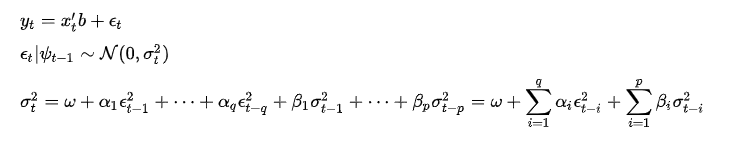

Text(0.5, 1.0, 'Variance')

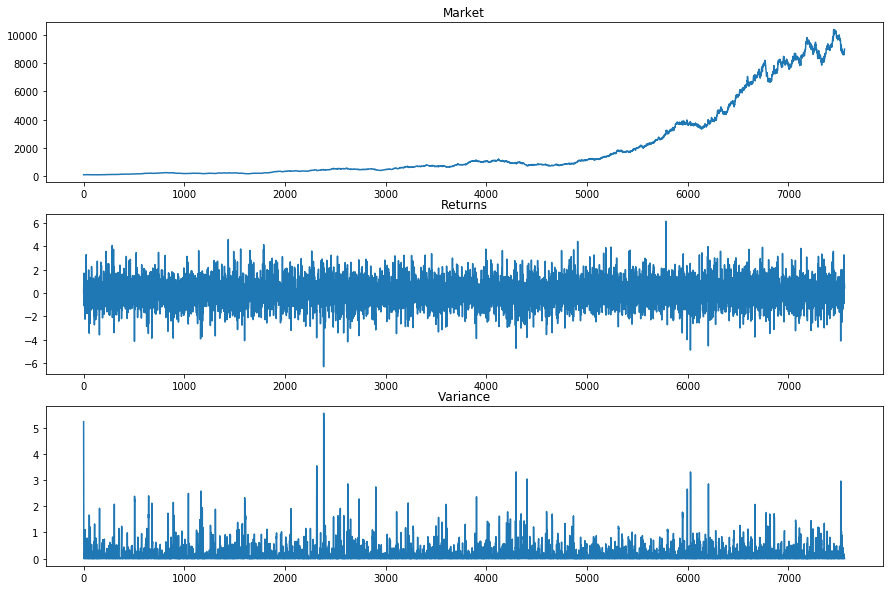

In [67]:
# 0: t, 1: y, 2: epsilon, 3: sigma^2, 4: df
horizon = 252*30
arr = np.empty((horizon, 5))
arr[:, 0] = range(horizon)

arr[0, 1] = np.mean(spx['daily_chg']*100)
arr[0, 2] = 0
arr[0, 3] = initial_sigma_2
arr[0, 4] = initial_df

for t in range(1, horizon):
    sigma_2 = omega + alpha*(arr[t-1, 2]**2) + beta*arr[t-1, 3] +  gamma*(arr[t-1, 2]**2) if arr[t-1, 2]<0 else 0
    if sigma_2 <= 1:
        df = 10
    else:
        df = sigma_2*2/(sigma_2-1)
    epsilon = stats.t.rvs(df, size=1)

    y = b + epsilon
    
    arr[t, 1] = y
    arr[t, 2] = epsilon
    arr[t, 3] = sigma_2
    arr[t, 4] = df
#plt.plot(arr[:, 1])

market = np.empty((horizon, 1))

#market_sample = stats.t.rvs(df, loc, *scale, size=252*years)
market[0, 0] = 100
for i, err in enumerate(arr[:, 1], start=1):
    if i < (horizon):
        market[i, 0] = market[i-1, 0]*(1+err/100)
    

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2 , ax3) = plt.subplots(3, 1, figsize=(15,10))

ax1.plot(market)
ax1.set_title('Market')
#ax1.set_yscale('log')

ax2.plot(arr[:, 1])
ax2.set_title('Returns')
#ax2.set_yscale('LOG')


ax3.plot(arr[:, 3])
ax3.set_title('Variance')
#ax3.set_yscale('LOG')


In [28]:
(market[-1, 0]/100)**(1/60)-1

0.011999139137457426

In [61]:
print(arr[:2,:])

[[ 0.00000000e+000  3.02263022e-002  3.02263022e-002  1.43845946e+000
   4.11062617e-321]
 [ 1.00000000e+000  5.00000000e-002 -0.00000000e+000  0.00000000e+000
   0.00000000e+000]]


In [58]:
print(np.mean(spx['daily_chg']*100))

0.030226302227745125


1.4384594613594446


In [63]:
print(arr[0,1])

0.030226302227745125


TypeError: 'initial_sigma_2' is an invalid keyword argument for print()